<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

![](assets/ron.png)

# Problem Statement

The mayor has asked us to analyze data collected on SAT and ACT standardized tests and see how we can improved. Which standardized test gives students a better chance of being accepted to colleges. 

# Data Import and Cleaning

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
act_17_full = pd.read_csv('data/act_2017.csv')
act_18 = pd.read_csv('data/act_2018.csv')
act_19 = pd.read_csv('data/act_2019.csv')

sat_17 = pd.read_csv('data/sat_2017.csv')
sat_18 = pd.read_csv('data/sat_2018.csv')
sat_19 = pd.read_csv('data/sat_2019.csv')

act_19_ca_districs = pd.read_csv('data/act_2019_ca.csv')
act_19_ca_full = pd.read_csv('data/act_2019_ca.csv')
sat_19_ca_full = pd.read_csv('data/sat_2019_ca.csv')

sat_act_coll = pd.read_csv('data/sat_act_by_college.csv')

In [3]:
act_17_full.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


---

### Data Cleaning

In [4]:
# Functions for cleaning data

def string_to_float(num):
    try:
        return float(num)
    except:
        return np.nan


def string_to_int(num):
    try:
        return int(num)
    except:
        return np.nan
    
def float_perc(num):
    try:
        return float(num[:-1])/100
    except:
        return num
    
def float_perc_b(num):
    try:
        return (num/100)
    except:
        return num
    
    
def calc_mean(lst):
    total = 0
    count = 0
    for num in lst:
        total += num
        count += 1
    mean = total / count
    return (mean)

def std_dev(lst):
    mean = calc_mean(lst)
    total_dev = 0
    for num in lst:
        total_dev += ((num - mean)**2)
    std_dev = round((total_dev / len(lst))**(1/2), 3)
    return std_dev

ACT

1. [x] DataFrame Heads

In [5]:
act_17_full.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [6]:
act_18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [7]:
act_19.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


2. [x] Check for missing values
- None

In [8]:
# act_17_full.isnull().sum()
# act_18.isnull().sum()
# act_19.isnull().sum()

3. [x] Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).

- [x] Correct input ```comp```

In [9]:
act_17_full['Composite'].iloc[50] = '20.2'

/Users/andrewdeemer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


- [x] Dropped ```act_18['Main']``` duplicate

In [10]:
act_18.drop_duplicates(inplace=True)

- [x] Remove act_17 first row "National" and saving it to its own variable 

In [11]:
act_17_national_full = act_17_full.iloc[0]
act_17_full.drop(index=act_17_full.index[0], axis=0, inplace=True)

- [x] Creating ```act_17_national``` with 'state', 'part', 'comp' 

In [12]:
act_17_national = act_17_national_full[['State', 'Participation', 'Composite']]

- [x] Creating National Avg for act_18 (17' and 19' already included National Avg)
- [x] floating ```Participation``` before grabbing mean

In [13]:
act_18['Participation'] = [float_perc(num) for num in act_18['Participation']]

In [14]:
act_18_national = pd.DataFrame({'State': 'National', 
                                'Participation': act_18['Participation'].mean(), 
                                'Composite': act_18['Composite'].mean()}, 
                                index=['2018'])

- [x] Removing "National" from act_19 and saving it into its own variable

In [15]:
act_19_national = act_19.iloc[-1]
act_19.drop(index=act_19.index[-1], axis=0, inplace=True)

- [x] Checking to see if all states are present in 3 df's: District of Columbia mismatch corrected

In [16]:
for state1, state2, state3 in zip(act_17_full.State, act_18.State, act_19.State):
     if state1 != state2 or state1 != state3:
        print('Error: ', state1, state2, state3)

Error:  District of Columbia District of columbia District of Columbia


In [17]:
act_18.State.mask(act_18.State == 'District of columbia', 'District of Columbia', inplace=True)

In [18]:
act_18.reset_index(drop= True, inplace=True)

5. [x] Check Data Types and convert where necessary

- [x] ```act_17_full``` Float percentages

In [19]:
act_17_full['Participation'] = [float_perc(num) for num in act_17_full['Participation']]

- [x] ```act_19_full``` Float percentages

In [20]:
act_19['Participation'] = [float_perc(num) for num in act_19['Participation']]


- [x] ```act_17_full``` float ```Composite```

In [21]:
act_17_full['Composite'] = [string_to_float(num) for num in act_17_full['Composite']]

- [x] check for any out of range numbers
None

In [22]:
# act_17

7. [ ] Drop unecessary rows / columns

- [ ] DROPPING Saving new act_17 df w/out individual test scores

In [23]:
act_17 = act_17_full[['State', 'Participation', 'Composite']]

6. [x] Renaming columns to be unique

In [24]:
act_17.rename(columns={'State': 'state',
                       'Participation': 'part_17',
                       'Composite': 'comp_17'}, inplace=True)
act_18.rename(columns={'State': 'state',
                       'Participation': 'part_18',
                       'Composite': 'comp_18'}, inplace=True)
act_19.rename(columns={'State': 'state',
                       'Participation': 'part_19',
                       'Composite': 'comp_19'}, inplace=True)

/Users/andrewdeemer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


8. [x] Merging act df's to ```act_merged```

In [25]:
act_merged = act_17.merge(act_18).merge(act_19)
act_merged.head()

,state,part_17,comp_17,part_18,comp_18,part_19,comp_19
0,Alabama,1.00,19.2,1.00,19.1,1.00,18.9
1,Alaska,0.65,19.8,0.33,20.8,0.38,20.1
2,Arizona,0.62,19.7,0.66,19.2,0.73,19.0
3,Arkansas,1.00,19.4,1.00,19.4,1.00,19.3
4,California,0.31,22.8,0.27,22.7,0.23,22.6


---

SAT

1. [x] DataFrame Heads

In [26]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [27]:
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [28]:
sat_19.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


2. [x] Check for missing values
- None

In [29]:
# sat_17.isnull().sum()
# sat_18.isnull().sum()
# sat_19.isnull().sum()

3. [x] Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).

In [30]:
print(sat_17.shape)
print(sat_18.shape)
print(sat_19.shape)

(51, 5)
(51, 5)
(53, 5)


- [x] Removing 'Puerto Rico' and Virgin Islands from ```sat_19```

In [31]:
sat_19.drop([39, 47], inplace=True)

In [32]:
sat_19.reset_index(drop=True, inplace=True)

- [x] Sorting df's by ```State```

In [33]:
sat_17 = sat_17.sort_values(by=['State'])
sat_18 = sat_18.sort_values(by=['State'])
sat_19 = sat_19.sort_values(by=['State'])

In [34]:
for state1, state2, state3 in zip(sat_17.State, sat_18.State, sat_19.State):
     if state1 != state2 or state1 != state3:
        print('Error: ', state1, state2, state3)

5. [x] Display data types and convert where necessary

- [x] ```['Participation']``` floating participation 

In [35]:
sat_17['Participation'] = [float_perc(num) for num in sat_17['Participation']]

In [36]:
sat_18['Participation'] = [float_perc(num) for num in sat_18['Participation']]

In [37]:
sat_19['Participation Rate'] = [float_perc(num) for num in sat_19['Participation Rate']]

In [38]:
sat_19.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

- [x] Renaming all columns

In [39]:
sat_17.rename(columns={'State': 'state',
                       'Participation': 'part_17',
                       'Evidence-Based Reading and Writing': 'EBRW_17',
                       'Math': 'math_17', 
                       'Total': 'total_17'}, inplace=True)
sat_18.rename(columns={'State': 'state',
                       'Participation': 'part_18',
                       'Evidence-Based Reading and Writing': 'EBRW_18',
                       'Math': 'math_18', 
                       'Total': 'total_18'}, inplace=True)
sat_19.rename(columns={'State': 'state',
                       'Participation Rate': 'part_19',
                       'EBRW': 'EBRW_19',
                       'Math': 'math_19', 
                       'Total': 'total_19'}, inplace=True)

9. [x] Merge dataframes that can be merged.

In [40]:
sat_merged = sat_17.merge(sat_18).merge(sat_19)
sat_merged.head()

,state,part_17,EBRW_17,math_17,total_17,part_18,EBRW_18,math_18,total_18,part_19,EBRW_19,math_19,total_19
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065


---

**California SAT & ACT**

1. [x] Dataframe Heads

In [41]:
act_19_ca_full.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [42]:
sat_19_ca_full.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


2. [x] Check for missing values
- Null values for scores, count, and percent when 0 test takers
- astrisk for test takers < 14
- when comparing passing scores and passing count, exclude these rows
- still able to compare difference in takers b/w ACT & SAT

In [43]:
act_19_ca_full.isnull().sum()

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

In [44]:
# sat_19_ca_full.isnull().sum()

7. [x] Drop unecessary columns

In [45]:
act_19_ca = act_19_ca_full[['CDS', 'RType', 'SName', 'DName', 'CName',
                            'Enroll12', 'NumTstTakr', 'NumGE21', 'PctGE21', 
                            'AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci']]

In [46]:
sat_19_ca = sat_19_ca_full[['CDS', 'RType', 'SName', 'DName', 'CName', 
                            'Enroll12', 'NumTSTTakr12', 'TotNumBothBenchmark12', 'PctBothBenchmark12']]

6. [x] Rename Columns

In [47]:
act_19_ca.rename(columns={'CDS': 'CDS',
                          'RType': 'record_type',
                          'SName': 'school', 
                          'DName': 'district', 
                          'CName': 'city',
                          'Enroll12': 'enroll_12', 
                          'NumTstTakr': 'act_part',
                          'NumGE21': 'act_count_over_20', 
                          'PctGE21': 'act_rate_over_20', 
                          'AvgScrRead': 'act_avg_read',
                          'AvgScrEng': 'act_avg_eng',
                          'AvgScrMath': 'act_avg_math',
                          'AvgScrSci': 'act_avg_sci'
                         }, inplace=True)

/Users/andrewdeemer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [48]:
sat_19_ca.rename(columns={'CDS': 'CDS',
                          'RType': 'record_type',
                          'SName': 'school', 
                          'DName': 'district', 
                          'CName': 'city',
                          'Enroll12': 'enroll_12', 
                          'NumTSTTakr12': 'sat_part',
                          'TotNumBothBenchmark12': 'sat_count_pass', 
                          'PctBothBenchmark12': 'sat_rate_pass'
                          }, inplace=True)

In [49]:
sat_19_ca.head()

,CDS,record_type,school,district,city,enroll_12,sat_part,sat_count_pass,sat_rate_pass
0,6.615981e+12,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN
1,6.616061e+12,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,*,*
2,1.964733e+13,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,14,13.73
3,1.964733e+13,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,18,15.93
4,1.964733e+13,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,*,*


8. [x] Merge df's to ```sat_act_19_ca```

In [50]:
sat_act_19_ca = pd.merge(sat_19_ca, act_19_ca, how='outer')

- [x] Converting ```sat_count_pass``` for integers and NaN

6. [x] Correct data types

In [51]:
sat_act_19_ca.sat_count_pass = [string_to_float(num) for num in sat_act_19_ca.sat_count_pass]

- [x] Converting ```sat_rate_pass``` strings to float. Then percents to range 0-1

In [52]:
sat_act_19_ca.sat_rate_pass = [string_to_float(num) for num in sat_act_19_ca.sat_rate_pass]

In [53]:
sat_act_19_ca.sat_rate_pass = [round(float_perc_b(num), 2) for num in sat_act_19_ca.sat_rate_pass]

- [x] Converting ```act_count_over_20``` to integer

In [54]:
sat_act_19_ca.act_count_over_20 = [string_to_int(num) for num in sat_act_19_ca.act_count_over_20]

- [x] Converting ```act_rate_over_20``` string to float. Then percents to range 0-1

In [55]:
sat_act_19_ca.act_rate_over_20 = [string_to_float(num) for num in sat_act_19_ca.act_rate_over_20]

In [56]:
sat_act_19_ca.act_rate_over_20 = [round(float_perc_b(num), 2) for num in sat_act_19_ca.act_rate_over_20]

In [57]:
sat_act_19_ca.head()

,CDS,record_type,school,district,city,enroll_12,sat_part,sat_count_pass,sat_rate_pass,act_part,act_count_over_20,act_rate_over_20,act_avg_read,act_avg_eng,act_avg_math,act_avg_sci
0,6.615981e+12,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6.616061e+12,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.964733e+13,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,14.0,0.14,31.0,4.0,0.13,17,15,17,16
3,1.964733e+13,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,18.0,0.16,32.0,9.0,0.28,19,18,18,18
4,1.964733e+13,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,NaN,1.0,NaN,NaN,*,*,*,*


- [x] Dropping ```sat_count_pass``` and ```act_count_over_20``` b/c I'll only analyze passing rates

In [58]:
sat_act_19_ca.drop(labels=['sat_count_pass', 'act_count_over_20'], axis=1, inplace=True)

- [x] ```sat_rate_pass``` replacing NaN with mean

In [59]:
sat_act_19_ca.loc[sat_act_19_ca.sat_rate_pass.isnull() == True, 'sat_rate_pass'] = \
    round(sat_act_19_ca.sat_rate_pass.mean(), 2)

- [x] ```act_rate_over_20``` replacing Nulls w/ mean 

In [60]:
sat_act_19_ca.loc[sat_act_19_ca.act_rate_over_20.isnull() == True, 'act_rate_over_20'] = \
    round(sat_act_19_ca.act_rate_over_20.mean(), 2)

- [ ] Check for Nulls after changing NaNs to means

In [61]:
sat_act_19_ca.dtypes

CDS                 float64
record_type          object
school               object
district             object
city                 object
enroll_12           float64
sat_part            float64
sat_rate_pass       float64
act_part            float64
act_rate_over_20    float64
act_avg_read         object
act_avg_eng          object
act_avg_math         object
act_avg_sci          object
dtype: object

In [62]:
sat_act_19_ca.isnull().sum()

CDS                   1
record_type           1
school              598
district             59
city                  1
enroll_12             1
sat_part             22
sat_rate_pass         0
act_part            292
act_rate_over_20      0
act_avg_read        648
act_avg_eng         648
act_avg_math        648
act_avg_sci         648
dtype: int64

In [63]:
sat_act_19_ca.shape

(2601, 14)

- [x] Dropping row[2579] has Null's for every column

In [64]:
sat_act_19_ca.drop([2579], inplace=True)

In [65]:
# Districts
# sat_act_19_ca[sat_act_19_ca.record_type == 'D']

- [x] Converting ```act_avg_read``` to float

In [66]:
sat_act_19_ca.act_avg_read = [string_to_float(num) for num in sat_act_19_ca.act_avg_read]

- [x] Converting ```act_avg_eng``` to float

In [67]:
sat_act_19_ca.act_avg_eng = [string_to_float(num) for num in sat_act_19_ca.act_avg_eng]

- [x] Converting ```act_avg_math``` to float

In [68]:
sat_act_19_ca.act_avg_math = [string_to_float(num) for num in sat_act_19_ca.act_avg_math]

- [x] Converting ```act_avg_sci``` to float

In [69]:
sat_act_19_ca.act_avg_sci = [string_to_float(num) for num in sat_act_19_ca.act_avg_sci]

I chose not to replace Null scores because schools with fewer than 14 test takers didn't record results. I did not include these Null values when looking at summary statistics. 

- [ ] Replacing Nulls ```act_avg_read``` to median if ```act_part``` > 0

In [70]:
# sat_act_19_ca.loc[sat_act_19_ca.act_part > 0, 'act_avg_read'] = \
#     sat_act_19_ca[sat_act_19_ca.act_part > 0]['act_avg_read'].median()

- [ ] Replacing Nulls ```act_avg_eng``` to median if ```act_part``` > 0

In [71]:
# sat_act_19_ca.loc[sat_act_19_ca.act_part > 0, 'act_avg_eng'] = \
#     sat_act_19_ca[sat_act_19_ca.act_part > 0]['act_avg_eng'].median()

- [ ] Replacing Nulls ```act_avg_math``` to median if ```act_part``` > 0

In [72]:
# sat_act_19_ca.loc[sat_act_19_ca.act_part > 0, 'act_avg_math'] = \
#     sat_act_19_ca[sat_act_19_ca.act_part > 0]['act_avg_math'].median()

- [ ] Replacing Nulls ```act_avg_sci``` to median if ```act_part``` > 0

In [73]:
# sat_act_19_ca.loc[sat_act_19_ca.act_part > 0, 'act_avg_sci'] = \
#     sat_act_19_ca[sat_act_19_ca.act_part > 0]['act_avg_sci'].median()

In [74]:
# sat_act_19_ca[sat_act_19_ca.act_part > 0].head()

- [x] Creating ```avg_act_score``` from mean of individual scores to be able to sort df by this column

In [75]:
sat_act_19_ca['act_avg_score'] = (sat_act_19_ca['act_avg_read'] + \
                                  sat_act_19_ca['act_avg_eng'] + \
                                  sat_act_19_ca['act_avg_math'] + \
                                  sat_act_19_ca['act_avg_sci']) /4

3. [x] Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).

In [76]:
sat_act_19_ca.head()

,CDS,record_type,school,district,city,enroll_12,sat_part,sat_rate_pass,act_part,act_rate_over_20,act_avg_read,act_avg_eng,act_avg_math,act_avg_sci,act_avg_score
0,6.615981e+12,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,0.43,0.0,0.53,NaN,NaN,NaN,NaN,NaN
1,6.616061e+12,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,0.43,0.0,0.53,NaN,NaN,NaN,NaN,NaN
2,1.964733e+13,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,0.14,31.0,0.13,17.0,15.0,17.0,16.0,16.25
3,1.964733e+13,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,0.16,32.0,0.28,19.0,18.0,18.0,18.0,18.25
4,1.964733e+13,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,0.43,1.0,0.53,NaN,NaN,NaN,NaN,NaN


In [77]:
sat_act_19_ca.dtypes

CDS                 float64
record_type          object
school               object
district             object
city                 object
enroll_12           float64
sat_part            float64
sat_rate_pass       float64
act_part            float64
act_rate_over_20    float64
act_avg_read        float64
act_avg_eng         float64
act_avg_math        float64
act_avg_sci         float64
act_avg_score       float64
dtype: object

---

SAT ACT by College

1. [x] DataFrame Heads

In [78]:
sat_act_coll.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


2. [x] Check for missing values
- ```Applies to Class Year(s)``` all schools that require test

In [79]:
# sat_act_coll[sat_act_coll['Applies to Class Year(s)'].isnull()]

In [80]:
sat_act_coll.isnull().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

6. [x] Correcting Data Types

- [x] Split up 25-75 percentiles, convert to int

In [81]:
# Spliting SAT 25th-75th percentiles
sat_act_coll['SAT Total 25th-75th Percentile'] = [string.split('-') for string in sat_act_coll['SAT Total 25th-75th Percentile']]

In [82]:
# Creating SAT 25th percentile column
sat_act_coll['SAT 25%'] = [string_to_int(lst[0]) for lst in sat_act_coll['SAT Total 25th-75th Percentile']]

In [83]:
# Creating SAT 75th percentile column
sat_act_coll['SAT 75%'] = [string_to_int(lst[1]) for lst in sat_act_coll['SAT Total 25th-75th Percentile']]

7. [x] Dropping old ```SAT Total 25th-75th Percentile``` column

In [84]:
# deleting old SAT Total 25th-75th Percentile strings column
del sat_act_coll['SAT Total 25th-75th Percentile']

- [x] Split up 25-75 percentiles, convert to int

In [85]:
# Spliting ACT 25th-75th percentiles
sat_act_coll['ACT Total 25th-75th Percentile'] = [string.split('-') for string in sat_act_coll['ACT Total 25th-75th Percentile']]

In [86]:
# Creating ACT 25th percentile column
sat_act_coll['ACT 25%'] = [string_to_int(lst[0]) for lst in sat_act_coll['ACT Total 25th-75th Percentile']]

In [87]:
# Creating ACT 75th percentile column
sat_act_coll['ACT 75%'] = [string_to_int(lst[1]) for lst in sat_act_coll['ACT Total 25th-75th Percentile']]

7. [x] Dropping old ```ACT Total 25th-75th Percentile``` column

In [88]:
# deleting old ACT Total 25th-75th Percentile strings column
del sat_act_coll['ACT Total 25th-75th Percentile']

- [x] Converting ```Accept Rate``` to float percent

In [89]:
sat_act_coll['Accept Rate'] = [round(float_perc(num),3) for num in sat_act_coll['Accept Rate']]

6. [x] Renaming columns

In [90]:
sat_act_coll.columns

Index(['School', 'Test Optional?', 'Applies to Class Year(s)',
       'Policy Details', 'Number of Applicants', 'Accept Rate', 'SAT 25%',
       'SAT 75%', 'ACT 25%', 'ACT 75%'],
      dtype='object')

In [91]:
sat_act_coll.rename(columns={'School': 'school',
                             'Test Optional?': 'optional',
                             'Applies to Class Year(s)': 'year_apply',
                             'Policy Details': 'policy',
                             'Number of Applicants': 'num_applicants',
                             'Accept Rate': 'accept_rate',
                             'SAT 25%': 'sat_q1',
                             'SAT 75%': 'sat_q3',
                             'ACT 25%': 'act_q1',
                             'ACT 75%': 'act_q3'
                             }, inplace=True)

- [x] Creating ```test_bind``` column

In [92]:
sat_act_coll["test_blind"] = sat_act_coll.policy.apply(lambda x: 1 if "blind" in x.lower() else 0)

- [x] Binning colleges into tiers to analyze correlations

In [93]:
coll_accept_bins = [0, 0.05, 0.1, 0.15, 0.25, 0.50, 0.75, 1]
coll_accept_bin_names = [1, 2, 3, 4, 5, 6, 7]
sat_act_coll['accept_tiers'] = pd.cut(sat_act_coll.accept_rate, bins=coll_accept_bins, labels=coll_accept_bin_names)

- [x] Creating q1 ACT & SAT percentages from their score scales 

In [94]:
sat_act_coll['sat_q1_perc'] = [round(num/1600, 2) for num in sat_act_coll.sat_q1]
sat_act_coll['act_q1_perc'] = [round(num/36, 2) for num in sat_act_coll.act_q1]

- [x] Creating new df ```coll_tiers_nat_avg``` to compare Colleges Q1 grades with national averages

In [95]:
sat_act_coll.head()

,school,optional,year_apply,policy,num_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3,test_blind,accept_tiers,sat_q1_perc,act_q1_perc
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440.0,1570.0,32.0,35.0,0,1,0.90,0.89
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460.0,1580.0,33.0,35.0,0,1,0.91,0.92
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440.0,1570.0,32.0,35.0,0,2,0.90,0.89
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,0.055,1450.0,1560.0,33.0,35.0,0,2,0.91,0.92
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,0.061,1460.0,1570.0,33.0,35.0,0,2,0.91,0.92


In [96]:
sat_19_total_avg = round(sat_19.total_19.mean()/1600, 3)
act_19_comp_avg = 20.7 / 36

act_coll_tiers_diff_nat = pd.DataFrame(sat_act_coll.groupby(['accept_tiers'])
                                      ['act_q1_perc'].mean() - act_19_comp_avg)
act_coll_tiers_diff_nat.reset_index(inplace=True)

sat_coll_tiers_diff_nat = pd.DataFrame(sat_act_coll.groupby(['accept_tiers'])
                                      ['sat_q1'].mean()/1600) - sat_19_total_avg
sat_coll_tiers_diff_nat.reset_index(inplace=True)

coll_tiers_nat_avg = pd.merge(act_coll_tiers_diff_nat, sat_coll_tiers_diff_nat, how='outer')
coll_tiers_nat_avg.rename(columns={'act_q1_perc': 'act_q1_diff', 
                                   'sat_q1': 'sat_q1_diff'}, inplace=True)

In [97]:
coll_tiers_nat_avg

,accept_tiers,act_q1_diff,sat_q1_diff
0,1,0.330000,0.210250
1,2,0.325625,0.185771
2,3,0.265000,0.149313
3,4,0.265400,0.138775
4,5,0.169819,0.070119
5,6,0.063788,-0.002265
6,7,0.028854,-0.024850


- [x] creating ```act_q1_avg``` and ```sat_q1_avg```

In [98]:
act_coll_tiers_nat_avg = pd.DataFrame(round(sat_act_coll.groupby(['accept_tiers'])['act_q1'].mean()))
act_coll_tiers_nat_avg.reset_index(inplace=True)

sat_coll_tiers_nat_avg = pd.DataFrame(round(sat_act_coll.groupby(['accept_tiers'])['sat_q1'].mean()))
sat_coll_tiers_nat_avg.reset_index(inplace=True)

- [x] Merging ```coll_tiers_nat_avg``` to show diff from national avg scores and avg q1 scores for each tier 

In [99]:
coll_tiers_nat_avg = pd.merge(coll_tiers_nat_avg, act_coll_tiers_nat_avg).merge(sat_coll_tiers_nat_avg)

In [101]:
coll_tiers_nat_avg.head()

,accept_tiers,act_q1_diff,sat_q1_diff,act_q1,sat_q1
0,1,0.330000,0.210250,32.0,1450.0
1,2,0.325625,0.185771,32.0,1411.0
2,3,0.265000,0.149313,30.0,1352.0
3,4,0.265400,0.138775,30.0,1336.0
4,5,0.169819,0.070119,27.0,1226.0


In [155]:
# sat_act_coll.head()

In [156]:
# sat_act_coll.dtypes

---

# Exploratory Data Analysis

1. [x] Summary Statistics

- [x] ```act_merged``` Summary Stats

In [105]:
act_merged.describe()

,part_17,comp_17,part_18,comp_18,part_19,comp_19
count,51.000000,50.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,21.540000,0.617255,21.496078,0.586667,21.464706
std,0.321408,2.035902,0.340371,2.111583,0.345159,2.194523
min,0.080000,17.800000,0.070000,17.700000,0.060000,17.900000
25%,0.310000,19.800000,0.285000,19.950000,0.245000,19.800000
50%,0.690000,21.400000,0.660000,21.300000,0.540000,21.100000
75%,1.000000,23.600000,1.000000,23.650000,1.000000,23.700000
max,1.000000,25.500000,1.000000,25.600000,1.000000,25.500000


- [x] ```sat_merged``` Summary Stats

In [106]:
sat_merged.describe()

,part_17,EBRW_17,math_17,total_17,part_18,EBRW_18,math_18,total_18,part_19,EBRW_19,math_19,total_19
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.457451,563.686275,556.235294,1120.019608,0.490588,560.803922,552.196078,1113.078431
std,0.352766,45.666901,84.909119,92.494812,0.373143,47.502627,47.772623,94.155083,0.387476,46.248035,51.290553,97.197910
min,0.020000,482.000000,52.000000,950.000000,0.020000,480.000000,480.000000,977.000000,0.020000,483.000000,460.000000,943.000000
25%,0.040000,533.500000,522.000000,1055.500000,0.045000,534.500000,522.500000,1057.500000,0.055000,527.500000,511.500000,1038.000000
50%,0.380000,559.000000,548.000000,1107.000000,0.520000,552.000000,544.000000,1098.000000,0.540000,550.000000,546.000000,1097.000000
75%,0.660000,613.000000,599.000000,1212.000000,0.775000,610.500000,593.500000,1204.000000,0.820000,612.000000,599.000000,1210.000000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,643.000000,655.000000,1298.000000,1.000000,636.000000,648.000000,1284.000000


- [x] ```sat_act_19_ca``` Summary Stats

In [107]:
sat_act_19_ca.describe()

,CDS,enroll_12,sat_part,sat_rate_pass,act_part,act_rate_over_20,act_avg_read,act_avg_eng,act_avg_math,act_avg_sci,act_avg_score
count,2.600000e+03,2600.000000,2579.000000,2600.000000,2309.000000,2600.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,2.911672e+13,742.768462,264.274137,0.432504,143.182763,0.527973,22.075299,21.204082,21.416608,21.356791,21.513195
std,1.429376e+13,10055.067714,3568.205236,0.186246,1816.545548,0.189160,3.673367,4.045587,3.380492,3.210470,3.530420
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,10.000000,14.000000,12.000000,12.000000
25%,1.964725e+13,63.000000,5.000000,0.330000,3.000000,0.500000,19.000000,18.000000,19.000000,19.000000,18.750000
50%,3.066597e+13,168.500000,55.000000,0.430000,30.000000,0.530000,22.000000,21.000000,21.000000,21.000000,21.500000
75%,3.777107e+13,459.000000,161.000000,0.520000,86.000000,0.580000,25.000000,24.000000,24.000000,24.000000,24.000000
max,5.872770e+13,489650.000000,170411.000000,1.000000,82668.000000,1.000000,32.000000,32.000000,32.000000,31.000000,31.750000


- [x] ```sat_19_maj``` Summary Stats

- [x] ```sat_act_coll``` Summary Stats

In [108]:
sat_act_coll.describe()

,num_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3,test_blind,sat_q1_perc,act_q1_perc
count,416.000000,416.000000,405.000000,410.000000,409.000000,408.000000,416.000000,405.000000,409.000000
mean,17481.759615,0.557034,1163.879012,1358.892683,24.726161,29.904412,0.072115,0.727481,0.686797
std,17447.621897,0.242117,126.276620,111.431443,4.124095,3.153436,0.258990,0.078973,0.114690
min,211.000000,0.043000,793.000000,1050.000000,15.000000,19.000000,0.000000,0.500000,0.420000
25%,5313.000000,0.376250,1070.000000,1270.000000,22.000000,28.000000,0.000000,0.670000,0.610000
50%,11622.000000,0.613000,1150.000000,1350.000000,24.000000,30.000000,0.000000,0.720000,0.670000
75%,23599.750000,0.742250,1250.000000,1440.000000,28.000000,32.000000,0.000000,0.780000,0.780000
max,111322.000000,0.999000,1490.000000,1580.000000,35.000000,36.000000,1.000000,0.930000,0.970000


2. [x] Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [109]:
# ACT 2017, 2018, 2019 Std Dev
act_merged_sd = {key: std_dev(item.dropna()) for key, item in \
                    act_merged.select_dtypes(include = ['float', 'int']).items()} 
act_merged_sd

{'part_17': 0.318,
 'comp_17': 2.015,
 'part_18': 0.337,
 'comp_18': 2.091,
 'part_19': 0.342,
 'comp_19': 2.173}

In [110]:
# SAT 2017, 2018, 2019 Std Dev
sat_merged_sd = {key: std_dev(item) for key, item in \
                 sat_merged.select_dtypes(include = ['float', 'int']).items()} 
sat_merged_sd

{'part_17': 0.349,
 'EBRW_17': 45.217,
 'math_17': 84.073,
 'total_17': 91.584,
 'part_18': 0.369,
 'EBRW_18': 47.035,
 'math_18': 47.302,
 'total_18': 93.227,
 'part_19': 0.384,
 'EBRW_19': 45.792,
 'math_19': 50.785,
 'total_19': 96.24}

In [111]:
# SAT ACT California 2019 Std Dev
sat_act_19_ca_sd = {key: std_dev(item.dropna()) for key, item in \
                    sat_act_19_ca.select_dtypes(include = ['float', 'int']).items()} 
sat_act_19_ca_sd

{'CDS': 14291006713628.92,
 'enroll_12': 10053.134,
 'sat_part': 3567.513,
 'sat_rate_pass': 0.186,
 'act_part': 1816.152,
 'act_rate_over_20': 0.189,
 'act_avg_read': 3.672,
 'act_avg_eng': 4.044,
 'act_avg_math': 3.379,
 'act_avg_sci': 3.209,
 'act_avg_score': 3.529}

In [112]:
sat_act_coll_sd = {key: std_dev(item.dropna()) for key, item in \
                    sat_act_coll.select_dtypes(include = ['float', 'int']).items()} 
sat_act_coll_sd

{'num_applicants': 17426.639,
 'accept_rate': 0.242,
 'sat_q1': 126.121,
 'sat_q3': 111.295,
 'act_q1': 4.119,
 'act_q3': 3.15,
 'test_blind': 0.259,
 'sat_q1_perc': 0.079,
 'act_q1_perc': 0.115}

 - [X] Which states have the highest/lowest part rates for 2017, 2018, 2019 SAT / ACT?

In [113]:
act_17.sort_values(by=['part_17'], ascending=False).head()

,state,part_17,comp_17
1,Alabama,1.0,19.2
18,Kentucky,1.0,20.0
50,Wisconsin,1.0,20.2
45,Utah,1.0,20.3
43,Tennessee,1.0,19.8


In [114]:
act_18.sort_values(by=['part_18'], ascending=False).head()

,state,part_18,comp_18
0,Alabama,1.0,19.1
17,Kentucky,1.0,20.2
49,Wisconsin,1.0,20.5
44,Utah,1.0,20.4
42,Tennessee,1.0,19.6


In [115]:
act_19.sort_values(by=['part_19'], ascending=False).head()

,state,part_19,comp_19
0,Alabama,1.0,18.9
17,Kentucky,1.0,19.8
49,Wisconsin,1.0,20.3
44,Utah,1.0,20.3
42,Tennessee,1.0,19.4


In [116]:
sat_17.sort_values(by=['part_17'], ascending=False).head()

,state,part_17,EBRW_17,math_17,total_17
8,District of Columbia,1.00,482,468,950
22,Michigan,1.00,509,495,1005
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
29,New Hampshire,0.96,532,520,1052


In [117]:
sat_18.sort_values(by=['part_18'], ascending=False).head()

,state,part_18,EBRW_18,math_18,total_18
5,Colorado,1.0,519,506,1025
6,Connecticut,1.0,535,519,1053
7,Delaware,1.0,505,492,998
22,Michigan,1.0,511,499,1011
12,Idaho,1.0,508,493,1001


In [118]:
sat_19.sort_values(by=['part_19'], ascending=False).head()

,state,part_19,EBRW_19,math_19,total_19
39,Rhode Island,1.0,503,492,995
13,Illinois,1.0,509,504,1013
22,Michigan,1.0,507,496,1003
5,Colorado,1.0,518,506,1024
6,Connecticut,1.0,529,516,1046


Lowest Participation for SAT and ACT each year

In [119]:
act_17.sort_values(by=['part_17']).head()

,state,part_17,comp_17
20,Maine,0.08,24.3
30,New Hampshire,0.18,25.5
8,Delaware,0.18,24.1
40,Rhode Island,0.21,24.0
39,Pennsylvania,0.23,23.7


In [120]:
act_18.sort_values(by=['part_18']).head()

,state,part_18,comp_18
19,Maine,0.07,24.0
39,Rhode Island,0.15,24.2
29,New Hampshire,0.16,25.1
7,Delaware,0.17,23.8
38,Pennsylvania,0.20,23.5


In [121]:
act_19.sort_values(by=['part_19']).head()

,state,part_19,comp_19
19,Maine,0.06,24.3
39,Rhode Island,0.12,24.7
7,Delaware,0.13,24.1
29,New Hampshire,0.14,25.0
38,Pennsylvania,0.17,23.6


In [122]:
sat_17.sort_values(by=['part_17']).head()

,state,part_17,EBRW_17,math_17,total_17
34,North Dakota,0.02,635,621,1256
24,Mississippi,0.02,634,607,1242
15,Iowa,0.02,641,635,1275
25,Missouri,0.03,640,631,1271
44,Utah,0.03,624,614,1238


In [123]:
sat_18.sort_values(by=['part_18']).head()

,state,part_18,EBRW_18,math_18,total_18
34,North Dakota,0.02,640,643,1283
50,Wyoming,0.03,633,625,1257
41,South Dakota,0.03,622,618,1240
27,Nebraska,0.03,629,623,1252
49,Wisconsin,0.03,641,653,1294


In [124]:
sat_19.sort_values(by=['part_19']).head()

,state,part_19,EBRW_19,math_19,total_19
34,North Dakota,0.02,627,636,1263
50,Wyoming,0.03,623,615,1238
41,South Dakota,0.03,633,635,1268
27,Nebraska,0.03,628,631,1260
49,Wisconsin,0.03,635,648,1283


- [x] 100% Participation change year to year

SAT required participation change year to year

In [125]:
sat_17_req = pd.DataFrame(sat_17[sat_17.part_17 == 1]['state']).rename(columns={'state': '2017'})
sat_18_req = pd.DataFrame(sat_18[sat_18.part_18 == 1]['state']).rename(columns={'state':'2018'})
sat_19_req = pd.DataFrame(sat_19[sat_19.part_19 == 1]['state']).rename(columns={'state':'2019'})
pd.concat([sat_17_req, sat_18_req, sat_19_req], axis=1)

,2017,2018,2019
5,NaN,Colorado,Colorado
6,Connecticut,Connecticut,Connecticut
7,Delaware,Delaware,Delaware
8,District of Columbia,NaN,NaN
9,NaN,NaN,Florida
12,NaN,Idaho,Idaho
13,NaN,NaN,Illinois
22,Michigan,Michigan,Michigan
39,NaN,NaN,Rhode Island


ACT required participation change year to year

In [126]:
act_17_req = pd.DataFrame(act_17[act_17.part_17 == 1]['state']).rename(columns={'state': '2017'})
act_18_req = pd.DataFrame(act_18[act_18.part_18 == 1]['state']).rename(columns={'state':'2018'})
act_19_req = pd.DataFrame(act_19[act_19.part_19 == 1]['state']).rename(columns={'state':'2019'})
pd.concat([act_17_req, act_18_req, act_19_req], axis=1)

,2017,2018,2019
0,NaN,Alabama,Alabama
1,Alabama,NaN,NaN
3,NaN,Arkansas,Arkansas
4,Arkansas,NaN,NaN
6,Colorado,NaN,NaN
17,NaN,Kentucky,Kentucky
18,Kentucky,Louisiana,Louisiana
19,Louisiana,NaN,NaN
24,Minnesota,Mississippi,Mississippi
25,Mississippi,Missouri,NaN


- [x] States highest and lowest mean total/composite scores for each year SAT and ACT

In [127]:
pd.concat([act_17.sort_values(by=['comp_17'])[['state', 'comp_17']].head(1).rename(index={23: '2017'}), 
           act_18.sort_values(by=['comp_18'])[['state', 'comp_18']].head(1).rename(index={23: '2018'}), 
           act_19.sort_values(by=['comp_19'])[['state', 'comp_19']].head(1).rename(index={23: '2019'})
          ], axis=1)

,state,comp_17,state,comp_18,state,comp_19
28,NaN,NaN,Nevada,17.7,Nevada,17.9
29,Nevada,17.8,NaN,NaN,NaN,NaN


In [128]:
pd.concat([act_17.sort_values(by=['comp_17'], ascending=False)[['state', 'comp_17']].head(1).rename(index={23: '2017'}), 
           act_18.sort_values(by=['comp_18'], ascending=False)[['state', 'comp_18']].head(1).rename(index={23: '2018'}), 
           act_19.sort_values(by=['comp_19'], ascending=False)[['state', 'comp_19']].head(1).rename(index={23: '2019'})
          ], axis=1)

,state,comp_17,state,comp_18,state,comp_19
6,NaN,NaN,Connecticut,25.6,NaN,NaN
21,NaN,NaN,NaN,NaN,Massachusetts,25.5
30,New Hampshire,25.5,NaN,NaN,NaN,NaN


In [129]:
pd.concat([sat_17.sort_values(by=['total_17'], ascending=False)[['state', 'total_17']].head(1).rename(index={23: '2017'}), 
           sat_18.sort_values(by=['total_18'], ascending=False)[['state', 'total_18']].head(1).rename(index={23: '2018'}), 
           sat_19.sort_values(by=['total_19'], ascending=False)[['state', 'total_19']].head(1).rename(index={23: '2019'})
          ], axis=1)

,state,total_17,state,total_18,state,total_19
2017,Minnesota,1295.0,NaN,NaN,NaN,NaN
2018,NaN,NaN,Minnesota,1298.0,NaN,NaN
2019,NaN,NaN,NaN,NaN,Minnesota,1284.0


In [130]:
pd.concat([sat_17.sort_values(by=['total_17'])[['state', 'total_17']].head(1).rename(index={23: '2017'}), 
           sat_18.sort_values(by=['total_18'])[['state', 'total_18']].head(1).rename(index={23: '2018'}), 
           sat_19.sort_values(by=['total_19'])[['state', 'total_19']].head(1).rename(index={23: '2019'})
          ], axis=1)

,state,total_17,state,total_18,state,total_19
8,District of Columbia,950.0,District of Columbia,977.0,NaN,NaN
48,NaN,NaN,NaN,NaN,West Virginia,943.0


- [ ] Creating ```req_change``` df to analyze change in test requirements over time 

In [131]:
req_change = pd.DataFrame({'ACT': [len(act_17_req), len(act_18_req), len(act_19_req)], 
                           'SAT': [len(sat_17_req), len(sat_18_req), len(sat_19_req)]}, index=[2017, 2018, 2019])

- [x] States w/ >50% participation on *both* tests each year?

In [132]:
for i in range(len(act_17)):
    if act_17.part_17.iloc[i] > 0.5 and act_18.part_18.iloc[i] > 0.5:
        print(act_17.state.iloc[i])

Alabama
Arizona
Arkansas
Florida
Georgia
Hawaii
Iowa
Kansas
Kentucky
Louisiana
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Mexico
North Carolina
North Dakota
Ohio
Oklahoma
South Carolina
South Dakota
Tennessee
Utah
West Virginia
Wisconsin
Wyoming


- [X] Which colleges have the highest median SAT and ACT scores for admittance?

In [133]:
# Creating SAT Median
sat_act_coll['sat_q2'] = (sat_act_coll['sat_q3'] - sat_act_coll['sat_q1']) / 2 + sat_act_coll['sat_q1']

In [134]:
sat_act_coll.sort_values(by='sat_q2', ascending=False).head(1)

,school,optional,year_apply,policy,num_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3,test_blind,accept_tiers,sat_q1_perc,act_q1_perc,sat_q2
31,Harvey Mudd College,Yes,2021,Harvey Mudd has adopted a one-year test option...,4045,0.137,1490.0,1570.0,33.0,35.0,0,3,0.93,0.92,1530.0


In [135]:
# Creating ACT Median
sat_act_coll['act_q2'] = (sat_act_coll['act_q3'] - sat_act_coll['act_q1']) / 2 + sat_act_coll['act_q1']

In [136]:
sat_act_coll.sort_values(by='act_q2', ascending=False).head(1)

,school,optional,year_apply,policy,num_applicants,accept_rate,sat_q1,sat_q3,act_q1,act_q3,test_blind,accept_tiers,sat_q1_perc,act_q1_perc,sat_q2,act_q2
5,California Institute of Technology,Yes (TB),2021 2022,CalTech has adopted a two-year Test Blind poli...,8367,0.064,NaN,1560.0,35.0,36.0,1,2,NaN,0.97,NaN,35.5


- [x] Which California school districts have the highest and lowest mean test scores?   

In [137]:
sat_act_19_ca[sat_act_19_ca.record_type == 'D']\
    .sort_values(by=['act_avg_score'], ascending=False)[['district', 'act_avg_score']]\
    .head(1)

,district,act_avg_score
2542,Fremont Union High,30.25


In [138]:
sat_act_19_ca[sat_act_19_ca.record_type == 'D']\
    .sort_values(by=['act_avg_score'])[['district', 'act_avg_score']]\
    .head(1)

,district,act_avg_score
2100,Golden Plains Unified,14.75


---

# Data Visualizations

1. [x] Heatmaps

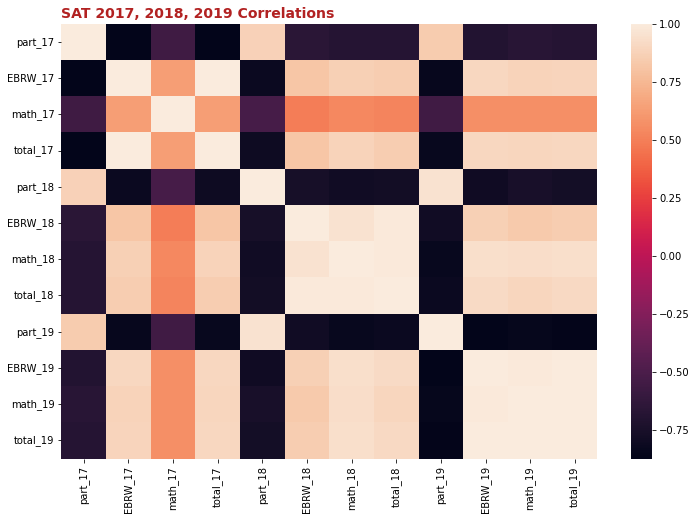

In [139]:
fix, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(sat_merged.corr());
ax.set_title('SAT 2017, 2018, 2019 Correlations', 
             fontsize=14, 
             fontweight='bold', 
             color='firebrick', 
             loc='left');

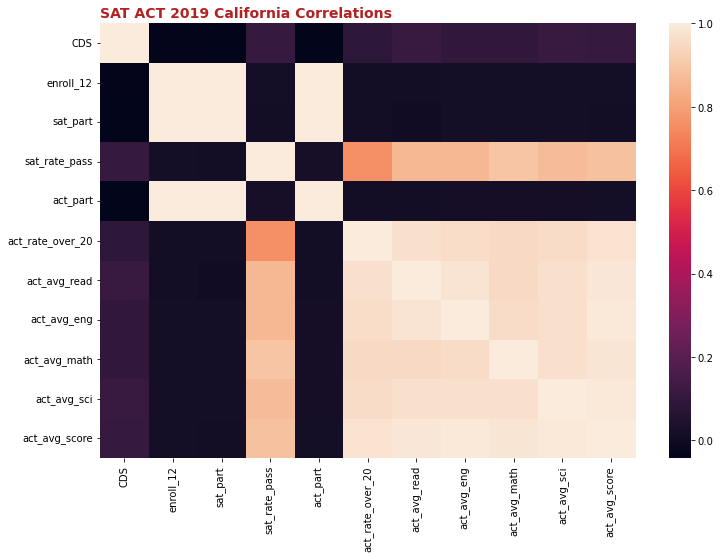

In [140]:
fix, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(sat_act_19_ca.corr());
ax.set_title('SAT ACT 2019 California Correlations', 
             fontsize=14, 
             fontweight='bold', 
             color='firebrick', 
             loc='left');

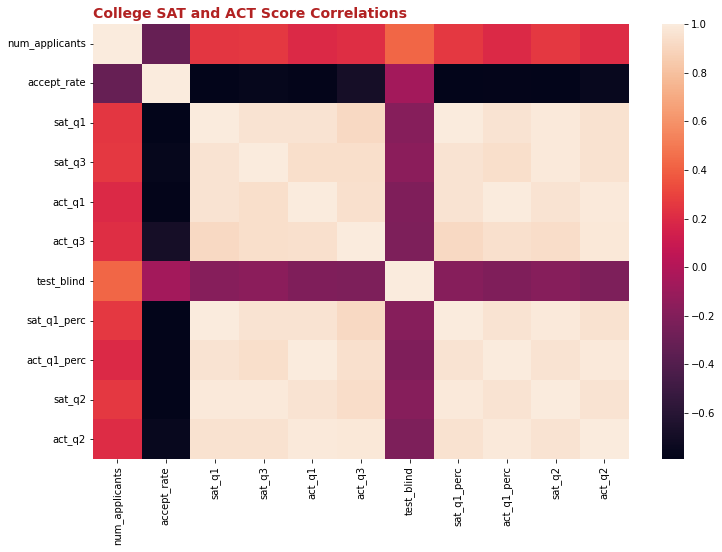

In [157]:
fix, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(sat_act_coll.corr());
ax.set_title('College SAT and ACT Score Correlations', 
             fontsize=14, 
             fontweight='bold', 
             color='firebrick', 
             loc='left');

2. [x] Histogram Distributions 

''

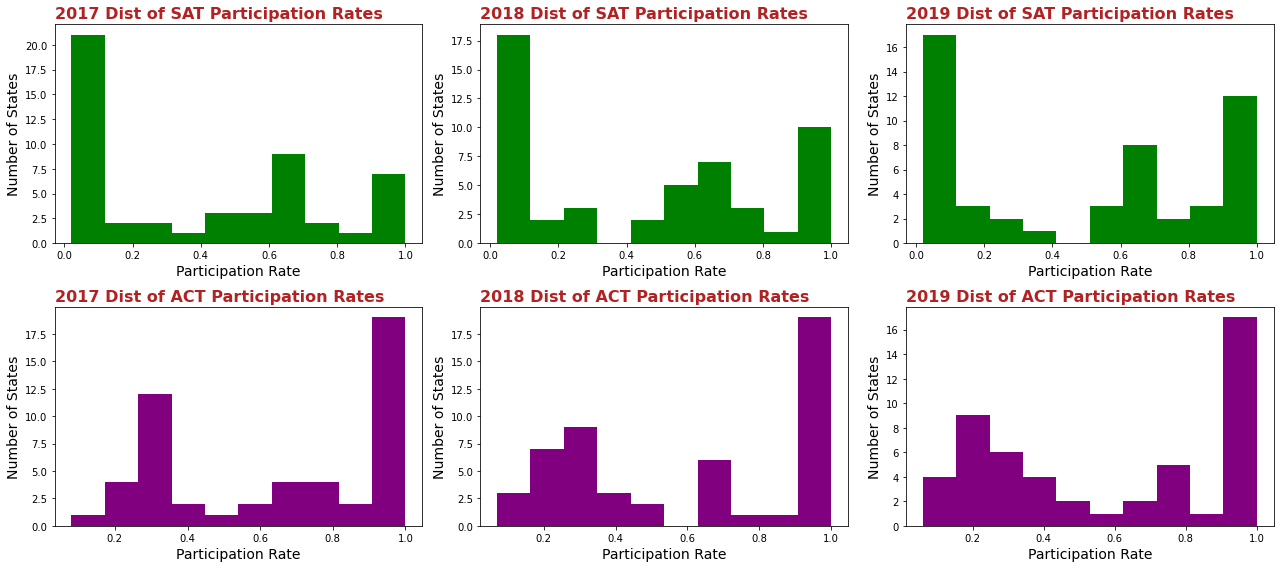

In [142]:
fix, ax = plt.subplots(2, 3, figsize=(18, 8))

ax[0][0].hist(sat_merged.part_17, bins=10, color='green')
ax[0][0].set_title('2017 Dist of SAT Participation Rates', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[0][0].set_xlabel('Participation Rate', fontsize=14)
ax[0][0].set_ylabel('Number of States', fontsize=14)

ax[0][1].hist(sat_merged.part_18, bins=10, color='green')
ax[0][1].set_title('2018 Dist of SAT Participation Rates', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[0][1].set_xlabel('Participation Rate', fontsize=14)
ax[0][1].set_ylabel('Number of States', fontsize=14)

ax[0][2].hist(sat_merged.part_19, bins=10, color='green')
ax[0][2].set_title('2019 Dist of SAT Participation Rates', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[0][2].set_xlabel('Participation Rate', fontsize=14)
ax[0][2].set_ylabel('Number of States', fontsize=14)

ax[1][0].hist(act_merged.part_17, bins=10, color='purple')
ax[1][0].set_title('2017 Dist of ACT Participation Rates', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[1][0].set_xlabel('Participation Rate', fontsize=14)
ax[1][0].set_ylabel('Number of States', fontsize=14)

ax[1][1].hist(act_merged.part_18, bins=10, color='purple')
ax[1][1].set_title('2018 Dist of ACT Participation Rates', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[1][1].set_xlabel('Participation Rate', fontsize=14)
ax[1][1].set_ylabel('Number of States', fontsize=14)
plt.tight_layout()

ax[1][2].hist(act_merged.part_19, bins=10, color='purple')
ax[1][2].set_title('2019 Dist of ACT Participation Rates', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[1][2].set_xlabel('Participation Rate', fontsize=14)
ax[1][2].set_ylabel('Number of States', fontsize=14)
plt.savefig('testimage.png')

;

# ax[1][0].set_ylim([0, 25])

''

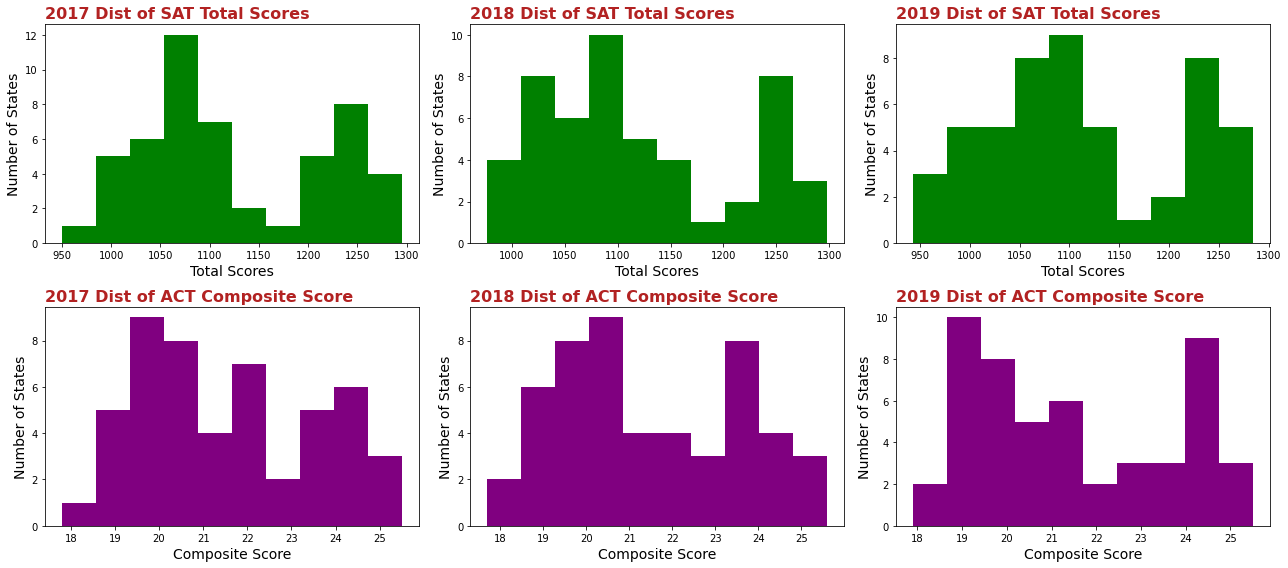

In [143]:
fix, ax = plt.subplots(2, 3, figsize=(18, 8))

ax[0][0].hist(sat_merged.total_17, bins=10, color='green')
ax[0][0].set_title('2017 Dist of SAT Total Scores', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[0][0].set_xlabel('Total Scores', fontsize=14)
ax[0][0].set_ylabel('Number of States', fontsize=14)

ax[0][1].hist(sat_merged.total_18, bins=10, color='green')
ax[0][1].set_title('2018 Dist of SAT Total Scores', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[0][1].set_xlabel('Total Scores', fontsize=14)
ax[0][1].set_ylabel('Number of States', fontsize=14)

ax[0][2].hist(sat_merged.total_19, bins=10, color='green')
ax[0][2].set_title('2019 Dist of SAT Total Scores', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[0][2].set_xlabel('Total Scores', fontsize=14)
ax[0][2].set_ylabel('Number of States', fontsize=14)

ax[1][0].hist(act_merged.comp_17, bins=10, color='purple')
ax[1][0].set_title('2017 Dist of ACT Composite Score', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[1][0].set_xlabel('Composite Score', fontsize=14)
ax[1][0].set_ylabel('Number of States', fontsize=14)

ax[1][1].hist(act_merged.comp_18, bins=10, color='purple')
ax[1][1].set_title('2018 Dist of ACT Composite Score', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[1][1].set_xlabel('Composite Score', fontsize=14)
ax[1][1].set_ylabel('Number of States', fontsize=14)
plt.tight_layout()

ax[1][2].hist(act_merged.comp_19, bins=10, color='purple')
ax[1][2].set_title('2019 Dist of ACT Composite Score', 
                   fontsize=16, fontweight='bold', color='firebrick', loc='left')
ax[1][2].set_xlabel('Composite Score', fontsize=14)
ax[1][2].set_ylabel('Number of States', fontsize=14)

# plt.savefig('testimage.png')

;

# ax[1][0].set_ylim([0, 25])

4. [x] Scatter Plots

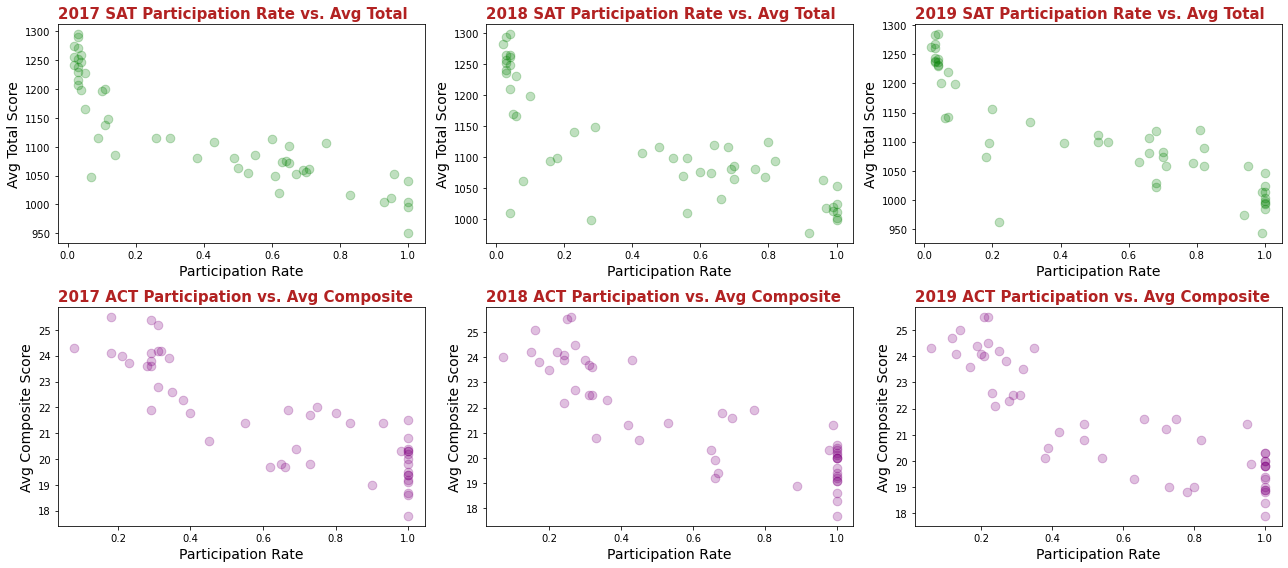

In [144]:
fix, ax = plt.subplots(2, 3, figsize=(18, 8))

ax[0][0].scatter(sat_merged.part_17, sat_merged.total_17,
                 color='green',
                 alpha=0.25,
                 s=75)
ax[0][0].set_title('2017 SAT Participation Rate vs. Avg Total', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[0][0].set_xlabel('Participation Rate', fontsize=14)
ax[0][0].set_ylabel('Avg Total Score', fontsize=14)

ax[0][1].scatter(sat_merged.part_18, sat_merged.total_18,
                 color='green',
                 alpha=0.25,
                 s=75)
ax[0][1].set_title('2018 SAT Participation Rate vs. Avg Total', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[0][1].set_xlabel('Participation Rate', fontsize=14)
ax[0][1].set_ylabel('Avg Total Score', fontsize=14)

ax[0][2].scatter(sat_merged.part_19, sat_merged.total_19,
                 color='green',
                 alpha=0.25,
                 s=75)
ax[0][2].set_title('2019 SAT Participation Rate vs. Avg Total', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[0][2].set_xlabel('Participation Rate', fontsize=14)
ax[0][2].set_ylabel('Avg Total Score', fontsize=14)

ax[1][0].scatter(act_merged.part_17, act_merged.comp_17,
                 color='purple',
                 alpha=0.25,
                 s=75)
ax[1][0].set_title('2017 ACT Participation vs. Avg Composite', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[1][0].set_xlabel('Participation Rate', fontsize=14)
ax[1][0].set_ylabel('Avg Composite Score', fontsize=14)

ax[1][1].scatter(act_merged.part_18, act_merged.comp_18,
                 color='purple',
                 alpha=0.25,
                 s=75)
ax[1][1].set_title('2018 ACT Participation vs. Avg Composite', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[1][1].set_xlabel('Participation Rate', fontsize=14)
ax[1][1].set_ylabel('Avg Composite Score', fontsize=14)

ax[1][2].scatter(act_merged.part_19, act_merged.comp_19,
                 color='purple',
                 alpha=0.25,
                 s=75)
ax[1][2].set_title('2019 ACT Participation vs. Avg Composite', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[1][2].set_xlabel('Participation Rate', fontsize=14)
ax[1][2].set_ylabel('Avg Composite Score', fontsize=14)

plt.tight_layout();

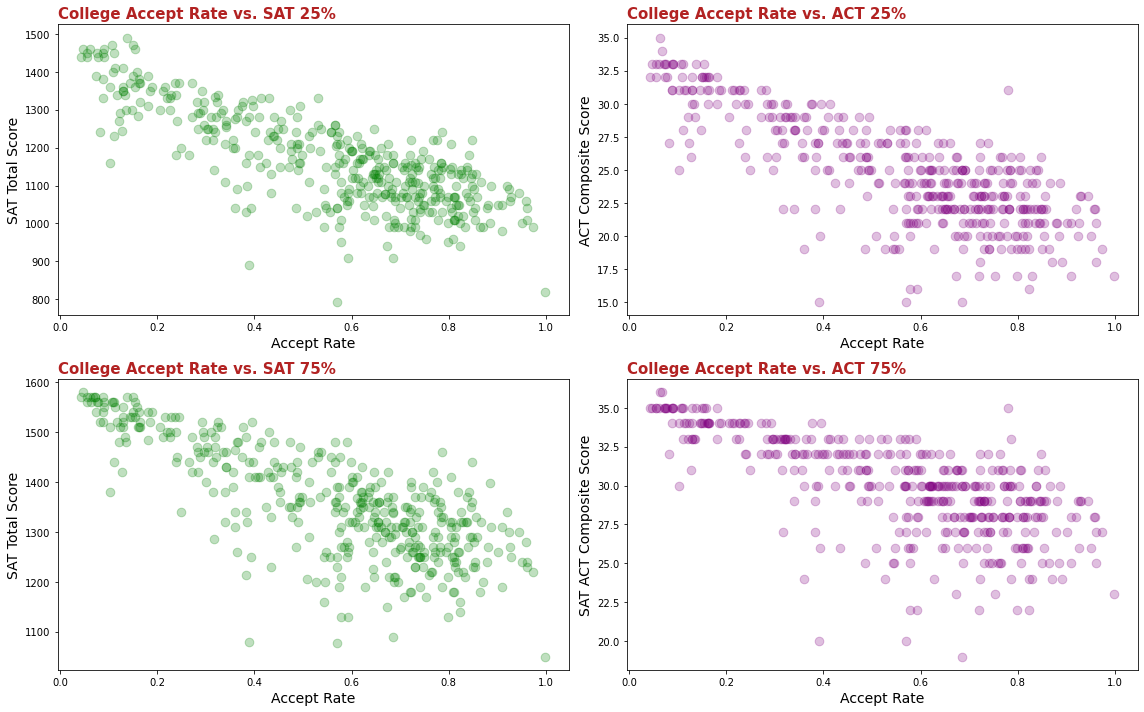

In [145]:
fix, ax = plt.subplots(2, 2, figsize=(16, 10))

ax[0][0].scatter(sat_act_coll.accept_rate, sat_act_coll.sat_q1,
                 color='green',
                 alpha=0.25,
                 s=75)
ax[0][0].set_title('College Accept Rate vs. SAT 25%', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[0][0].set_xlabel('Accept Rate', fontsize=14)
ax[0][0].set_ylabel('SAT Total Score', fontsize=14)

ax[0][1].scatter(sat_act_coll.accept_rate, sat_act_coll.act_q1,
                 color='purple',
                 alpha=0.25,
                 s=75)
ax[0][1].set_title('College Accept Rate vs. ACT 25%', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[0][1].set_xlabel('Accept Rate', fontsize=14)
ax[0][1].set_ylabel('ACT Composite Score', fontsize=14)

ax[1][0].scatter(sat_act_coll.accept_rate, sat_act_coll.sat_q3,
                 color='green',
                 alpha=0.25,
                 s=75)
ax[1][0].set_title('College Accept Rate vs. SAT 75%', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[1][0].set_xlabel('Accept Rate', fontsize=14)
ax[1][0].set_ylabel('SAT Total Score', fontsize=14)

ax[1][1].scatter(sat_act_coll.accept_rate, sat_act_coll.act_q3,
                 color='purple',
                 alpha=0.25,
                 s=75)
ax[1][1].set_title('College Accept Rate vs. ACT 75%', 
                   fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax[1][1].set_xlabel('Accept Rate', fontsize=14)
ax[1][1].set_ylabel('SAT ACT Composite Score', fontsize=14)

plt.tight_layout();

5. [x] Additional Plots 

**Requirement Change Year to Year**

- [ ] Creating ```req_change``` df to analyze change in test requirements over time 

In [146]:
req_change = pd.DataFrame({'ACT': [len(act_17_req), len(act_18_req), len(act_19_req)], 
                           'SAT': [len(sat_17_req), len(sat_18_req), len(sat_19_req)]}, index=[2017, 2018, 2019])

/var/folders/6_/32r78n_d53x2nss5m1qjc1pc0000gn/T/ipykernel_5296/3676029223.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0])


''

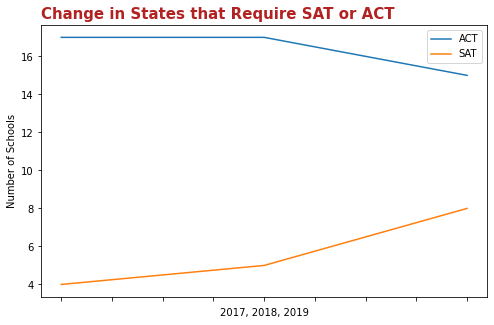

In [147]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(req_change['ACT'], label='ACT')
ax.plot(req_change['SAT'], label='SAT')
ax.set_xticklabels([0])
leg = ax.legend()
ax.set_xlabel('2017, 2018, 2019')
ax.set_ylabel('Number of Schools')
ax.set_title('Change in States that Require SAT or ACT', 
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
;

**School Tiers Q1 SAT/ACT vs. National Average**

''

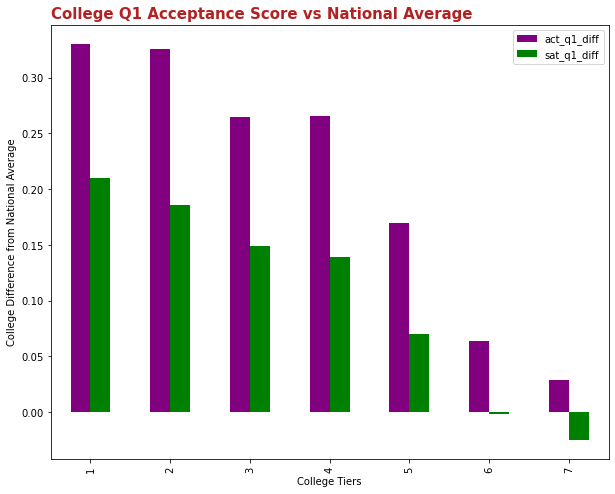

In [148]:
ax = coll_tiers_nat_avg.plot(x='accept_tiers', y=['act_q1_diff', 'sat_q1_diff'], kind='bar', figsize=(10,8), 
                            color=['purple', 'green'])
ax.set_title('College Q1 Acceptance Score vs National Average', 
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_xlabel('College Tiers')
ax.set_ylabel('College Difference from National Average')
;

Average Q1 Scores for Each College Tier. These can be used as Target Scores for your students

In [158]:
# coll_tiers_nat_avg.head()

''

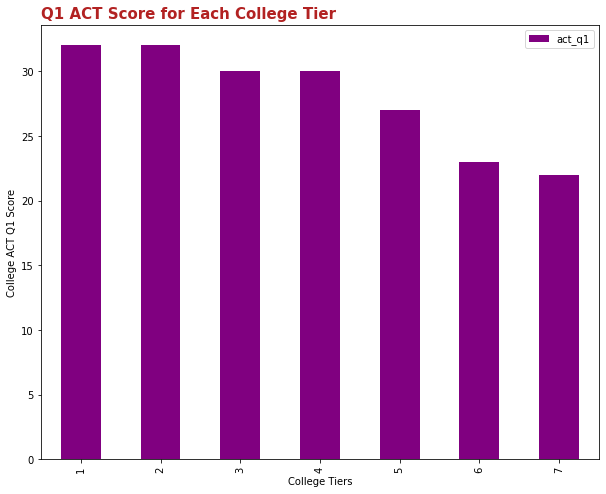

In [150]:
ax = coll_tiers_nat_avg.plot(x='accept_tiers', y='act_q1', kind='bar', figsize=(10,8), color='purple')

ax.set_title('Q1 ACT Score for Each College Tier',
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_xlabel('College Tiers')
ax.set_ylabel('College ACT Q1 Score')
;

''

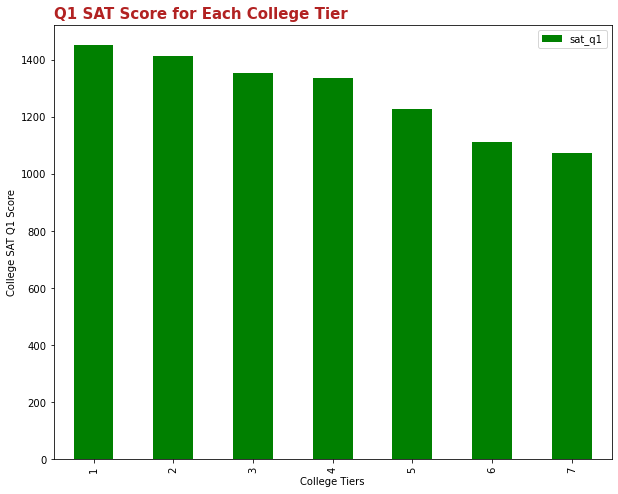

In [151]:
ax = coll_tiers_nat_avg.plot(x='accept_tiers', y='sat_q1', kind='bar', figsize=(10,8), color='green')

ax.set_title('Q1 SAT Score for Each College Tier',
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_xlabel('College Tiers')
ax.set_ylabel('College SAT Q1 Score')
;

In [159]:
# sat_act_19_ca.head()

Which test is more popular

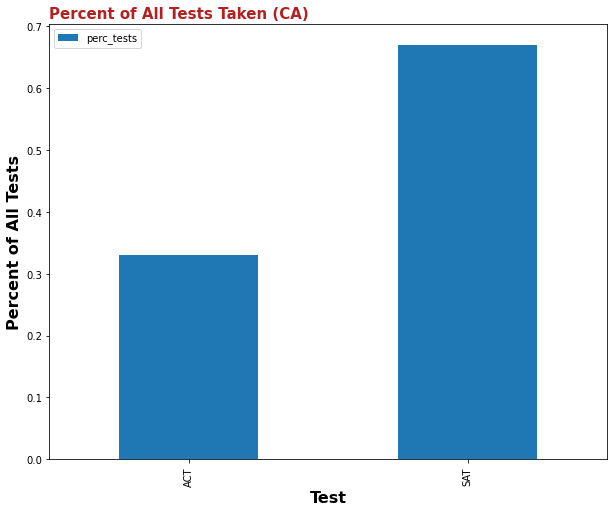

In [153]:
total_tests_taken = sat_act_19_ca.sat_part.sum() + sat_act_19_ca.act_part.sum()
ax = pd.DataFrame({'perc_tests':[round(sat_act_19_ca.act_part.sum() / total_tests_taken, 2),
                                 round(sat_act_19_ca.sat_part.sum() / total_tests_taken, 2)]}, 
                  index=['ACT', 'SAT']).plot(kind='bar', figsize=(10,8))
ax.set_title('Percent of All Tests Taken (CA)', 
            fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_xlabel('Test', size=16, weight='bold')
ax.set_ylabel('Percent of All Tests', size=16, weight='bold');

Is there a difference in students' performance in math and english between the two tests? 

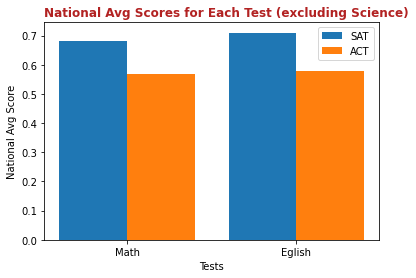

In [154]:
plt.bar(np.arange(2) - 0.2, [round(sat_merged.math_17.mean()/800, 2), 
                            round(sat_merged.EBRW_17.mean()/800, 2)], 
        0.4, label = 'SAT')


plt.bar(np.arange(2) + 0.2, [round(act_17_national_full['Math']/36, 2), 
                            round((act_17_national_full['English'] +  act_17_national_full['Reading']) / 2 / 36, 2)],
        0.4, label = 'ACT')

plt.xticks(np.arange(2), ['Math', 'Eglish'])
plt.xlabel("Tests")
plt.ylabel("National Avg Score")
plt.title("National Avg Scores for Each Test (excluding Science)",  
            fontsize=12, fontweight='bold', color='firebrick', loc='left')
plt.legend()
plt.show()